In [401]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, auc as sk_auc
from sklearn.preprocessing import label_binarize
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [378]:
# fetch dataset
heart = fetch_ucirepo(id=45)

# data (as pandas dataframes)
x = heart.data.features
y = heart.data.targets

# metadata
print(heart.metadata)

# variable information
print(heart.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [379]:
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [380]:
x.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [381]:
x['ca'] = x['ca'].fillna(np.mean(x['ca']))
x['thal'] = x['thal'].fillna(np.mean(x['thal']))
x.isnull().sum()
x.head()

/tmp/ipython-input-3354968035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['ca'] = x['ca'].fillna(np.mean(x['ca']))
/tmp/ipython-input-3354968035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['thal'] = x['thal'].fillna(np.mean(x['thal']))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [382]:
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
minmax = MinMaxScaler()
x[numeric_features] = minmax.fit_transform(x[numeric_features])

/tmp/ipython-input-23920483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numeric_features] = minmax.fit_transform(x[numeric_features])


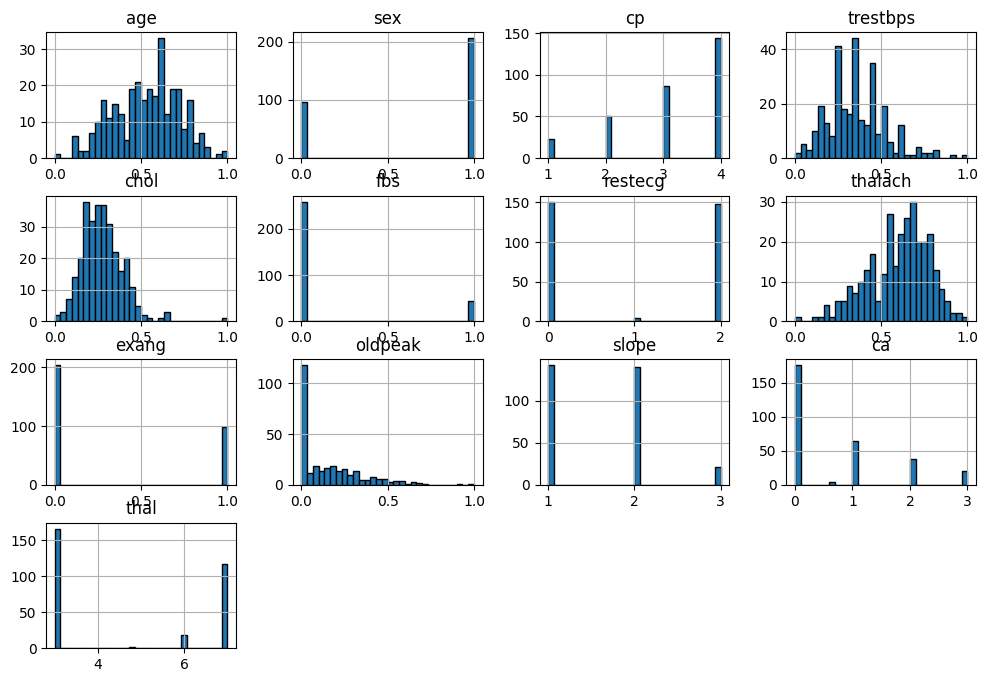

In [383]:
x.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.show()

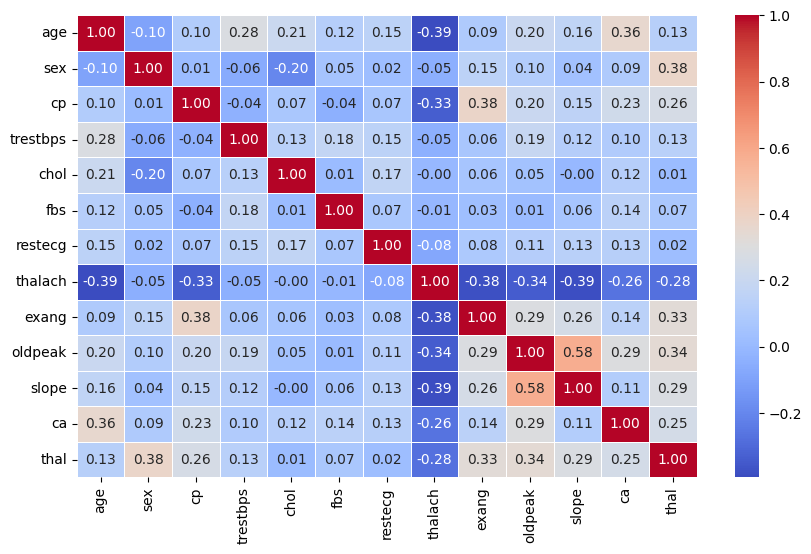

In [384]:
plt.figure(figsize=(10, 6))
corr = x.corr(numeric_only=True)
sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

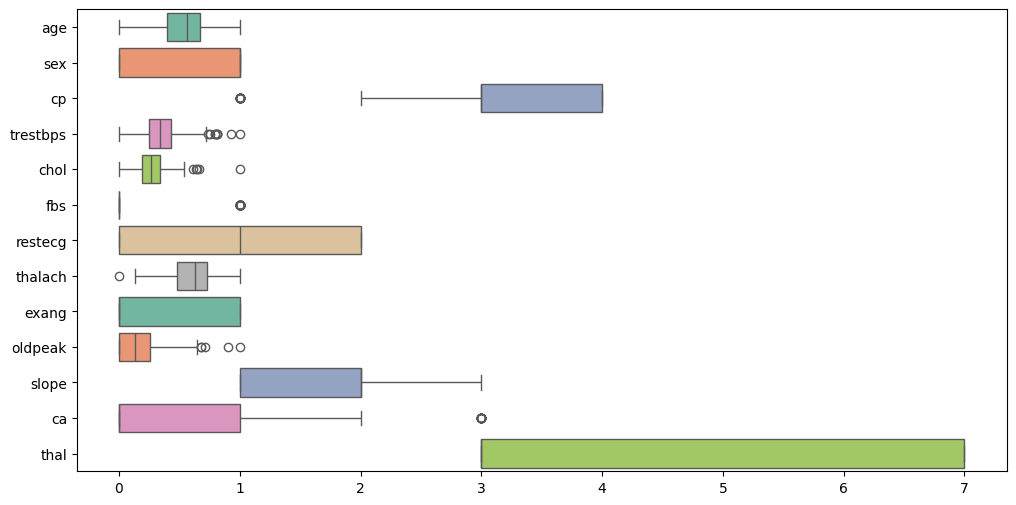

In [385]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=x, orient="h", palette="Set2")
plt.show()

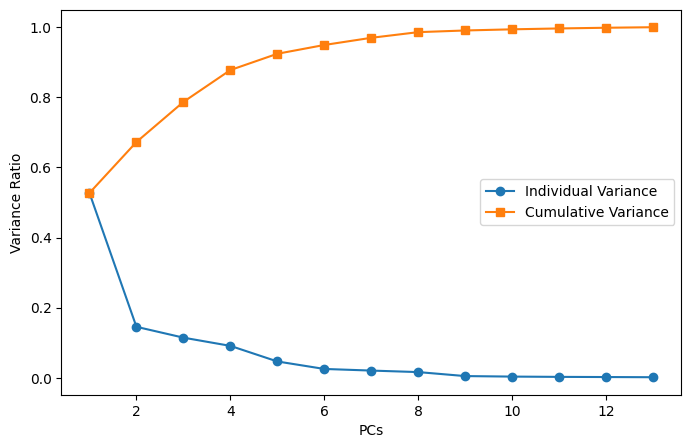

In [386]:
pca = PCA()
x = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label="Individual Variance")
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='s', label="Cumulative Variance")
plt.xlabel("PCs")
plt.ylabel("Variance Ratio")
plt.legend()
plt.show()


/tmp/ipython-input-369710842.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(x=x[:, 0], y=x[:, 1], s=50, palette="Set2")


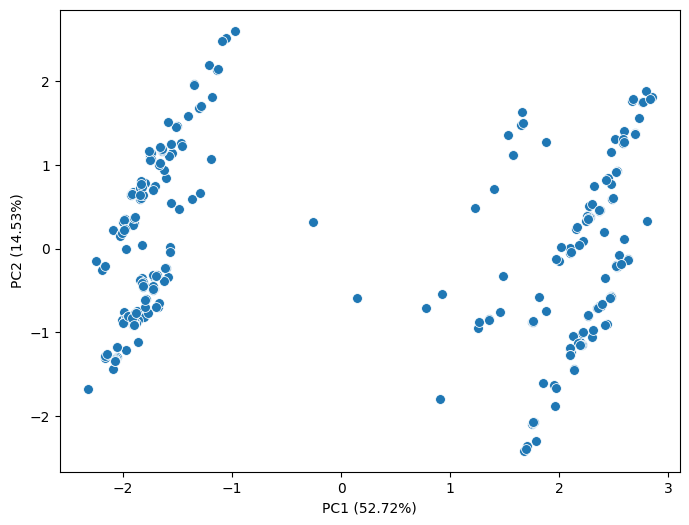

In [387]:
plt.figure(figsize=(8, 6))
sb.scatterplot(x=x[:, 0], y=x[:, 1], s=50, palette="Set2")
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


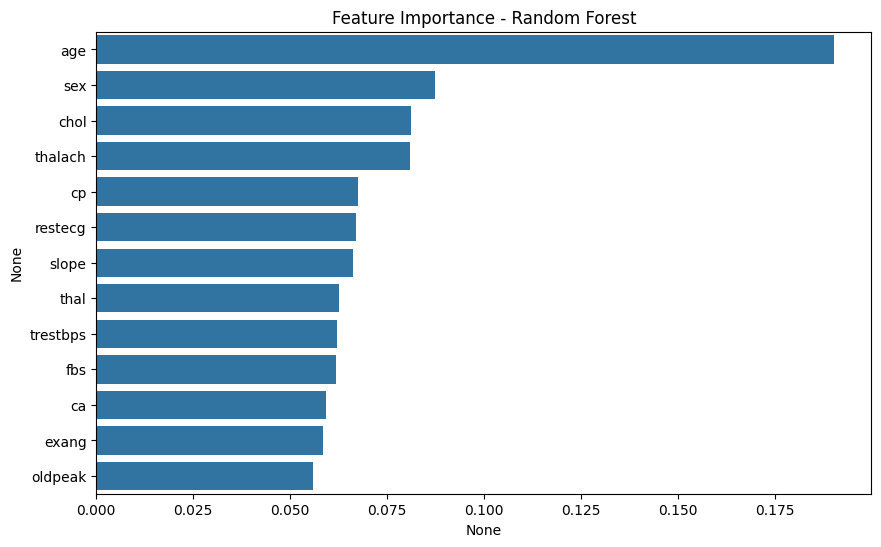

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:39:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


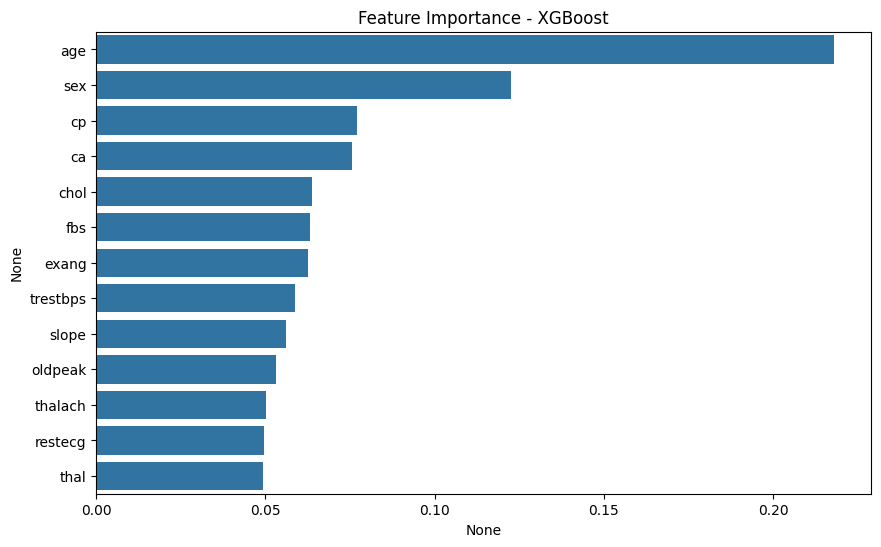

In [388]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x, y)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
x = pd.DataFrame(x, columns=feature_names)



rf_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x=rf_importances, y=rf_importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(x, y)

xgb_importances = pd.Series(xgb.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x=xgb_importances, y=xgb_importances.index)
plt.title("Feature Importance - XGBoost")
plt.show()


In [389]:
estimator = LogisticRegression(max_iter=1000, solver="liblinear")
selector = RFE(estimator, n_features_to_select=7)
selector = selector.fit(x, y)

rfe_selected = pd.DataFrame({
    "Feature": x.columns,
    "Selected": selector.support_,
    "Ranking": selector.ranking_
}).sort_values(by="Ranking")

print(rfe_selected)

     Feature  Selected  Ranking
0        age      True        1
1        sex      True        1
2         cp      True        1
4       chol      True        1
7    thalach      True        1
5        fbs      True        1
10     slope      True        1
8      exang      True        1
11        ca      True        1
12      thal      True        1
9    oldpeak     False        2
6    restecg     False        3
3   trestbps     False        4


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [390]:
top_features = rf_importances.head(7).index

x = x[top_features]
print("Selected features:", list(x.columns))


Selected features: ['age', 'sex', 'chol', 'thalach', 'cp', 'restecg', 'slope', 'thal', 'trestbps', 'fbs']


In [391]:


# ======================================
# 1. Train-Test Split (80/20)
# ======================================
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

results = {}
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}




results_df = pd.DataFrame(results).T
print("\n📊 Model Performance:\n", results_df)




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



📊 Model Performance:
                      Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.590164   0.532010  0.590164  0.558652  0.789897
Decision Tree        0.360656   0.440497  0.360656  0.394695  0.500028
Random Forest        0.557377   0.567880  0.557377  0.557837  0.725862
SVM                  0.573770   0.522560  0.573770  0.536090  0.804942

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.24      0.36      0.29        11
           2       0.25      0.14      0.18         7
           3       0.38      0.43      0.40         7
           4       0.00      0.00      0.00         3

    accuracy                           0.56        61
   macro avg       0.34      0.34      0.34        61
weighted avg       0.57      0.56      0.56        61



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

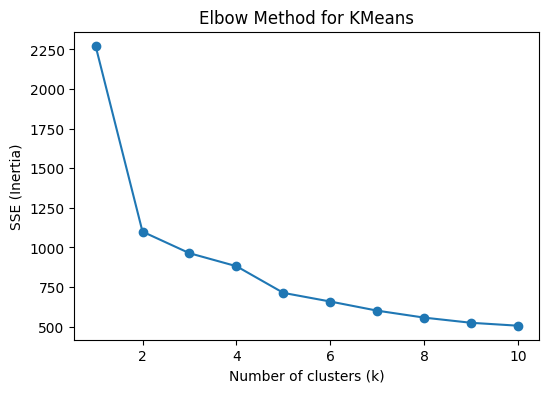

In [393]:
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for KMeans")
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(x)

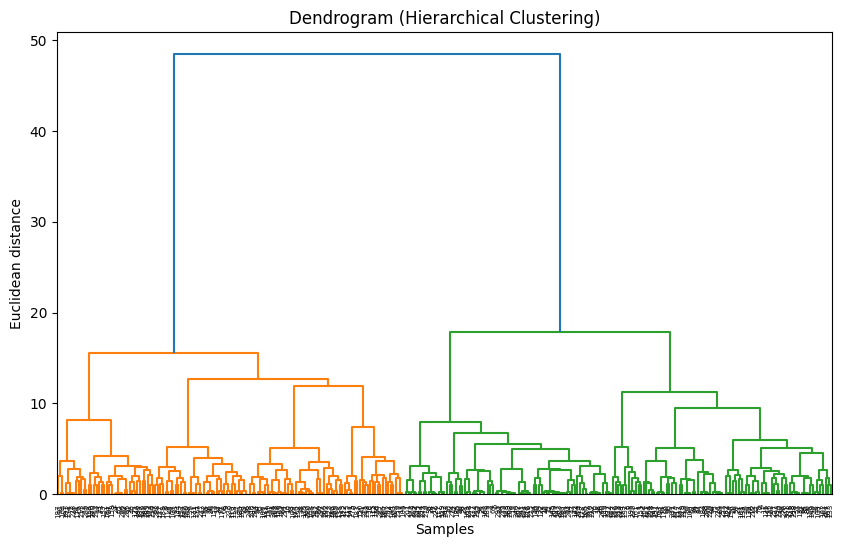

In [395]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [400]:
y_true = y.values.ravel()
print("KMeans Evaluation:")
print("  ARI:", adjusted_rand_score(y_true, y_kmeans))
print("  NMI:", normalized_mutual_info_score(y_true, y_kmeans))

print("\nHierarchical Clustering Evaluation:")
print("  ARI:", adjusted_rand_score(y_true, y_hc))
print("  NMI:", normalized_mutual_info_score(y_true, y_hc))

KMeans Evaluation:
  ARI: 0.16831098138666842
  NMI: 0.16153130883183417

Hierarchical Clustering Evaluation:
  ARI: 0.16475891426444908
  NMI: 0.16346754291309393


In [403]:
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"],
        "kernel": ["linear", "rbf", "poly"]
    }
}


In [404]:
best_models = {}

for name, model in baseline_models.items():
    print(f"\n🔎 Tuning {name}...")

    grid = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    rand = RandomizedSearchCV(model, param_distributions=param_grids[name],
                              n_iter=5, cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
    rand.fit(X_train, y_train)

    best_search = grid if grid.best_score_ >= rand.best_score_ else rand

    best_models[name] = best_search.best_estimator_
    print(f"✅ Best Params ({name}): {best_search.best_params_}")
    print(f"CV Accuracy: {best_search.best_score_:.4f}")



🔎 Tuning Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


✅ Best Params (Logistic Regression): {'C': 0.1, 'penalty': 'l1'}
CV Accuracy: 0.5991

🔎 Tuning Decision Tree...
✅ Best Params (Decision Tree): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 10}
CV Accuracy: 0.5702

🔎 Tuning Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


✅ Best Params (Random Forest): {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
CV Accuracy: 0.6033

🔎 Tuning SVM...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


✅ Best Params (SVM): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
CV Accuracy: 0.6119


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [405]:
print("\n📊 Final Evaluation on Test Set")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Test Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred))



📊 Final Evaluation on Test Set
Logistic Regression: Test Accuracy = 0.6230
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        33
           1       0.30      0.27      0.29        11
           2       0.00      0.00      0.00         7
           3       0.27      0.43      0.33         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        61
   macro avg       0.27      0.33      0.30        61
weighted avg       0.52      0.62      0.56        61

Decision Tree: Test Accuracy = 0.6230
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.43      0.27      0.33        11
           2       0.25      0.29      0.27         7
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        61
   macro avg     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [408]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(C=0.1, kernel="linear", gamma="scale", probability=True, random_state=42))
])

pipeline.fit(X_train, y_train.values.ravel())
joblib.dump(pipeline, "best_model.pkl")




['best_model.pkl']